In [ ]:
# Author: Jacek Diakun
# e-mail: jacek.diakun@o2.pl

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  scipy.interpolate import CubicSpline

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
# setting variables for reading from file

path1 = 'drive/MyDrive/Dataset'

folder_sep = '/'  # Unix
#folder_sep = '\\' # Windows

folder2_prefix  = 'sesion_'
folder2_postfix = '_20'

sensor_prefix = 'sensor'
environments = ['air', 'izopropanol', 'water']

filename_extension = '.txt'

In [5]:
# data from file will be loaded into one dictionary of dictionaries for all measurements

measurements_dict = {}

In [6]:
# reading data from files in folder structure to dictionaries

sensor_num_start =  1
sensor_num_stop  = 10

for sensor_num in range(sensor_num_start, sensor_num_stop+1):
    sensor_num_leading_zeros = f'{sensor_num:02}'
    sensor_id = sensor_prefix + sensor_num_leading_zeros
    
    folder2 = folder2_prefix + sensor_num_leading_zeros + folder2_postfix

    sensor = {}
    
    for environment in environments:
        path = path1 + folder_sep + folder2 + folder_sep
        filename = sensor_id + '_' + environment + filename_extension
        temp_df = pd.read_csv(path + filename,
                              sep=',',
                              header=None)
        temp_df.rename(columns={temp_df.columns[0]: 'x',
                                temp_df.columns[1]: 'y' },
                                inplace=True)
        sensor[environment] = temp_df
        
    measurements_dict[sensor_id] = sensor

In [7]:
# measurements are organized by sensors' ids

measurements_dict.keys()

dict_keys(['sensor01', 'sensor02', 'sensor03', 'sensor04', 'sensor05', 'sensor06', 'sensor07', 'sensor08', 'sensor09', 'sensor10'])

In [8]:
# for each sensors measurements for each environment are organized as dictionary

measurements_dict['sensor01'].keys()

dict_keys(['air', 'izopropanol', 'water'])

In [216]:
# example measurement for sensor and environment

measurements_dict['sensor01']['air']

,x,y
0,0.000001,9.1792
1,0.000001,9.2003
2,0.000001,9.1968
3,0.000001,9.1028
4,0.000001,9.0601
...,...,...
2996,0.000002,3.8310
2997,0.000002,3.8613
2998,0.000002,3.8361
2999,0.000002,3.9466


In [10]:
# checking if all x values are the same for every measurement

base_environment = environments[-1]
all_x_axis_are_equal = True

for sensor_id in measurements_dict.keys():
    for environment in environments[:-1]:
        all_x_axis_are_equal = measurements_dict[sensor_id][base_environment]['x'].equals(measurements_dict[sensor_id][environment]['x'])
        if not all_x_axis_are_equal:
            break
            
    if not all_x_axis_are_equal:
        break
            
if not all_x_axis_are_equal:
    print('Different x axis!')
else:
    print('All x axis are the same!')

All x axis are the same!


In [11]:
# x values are the same for every measurement

x = measurements_dict['sensor01']['water']['x']

In [13]:
# loading all sensors' names into list

all_sensors = list(measurements_dict.keys())

In [16]:
# reorganizing data structure with measurements to get it by environment and sensor id
# in order to get it in convention: measurements_df[environment][sensor_id]

measurements_df = {} 

measurements_df['air']         = pd.DataFrame()
measurements_df['water']       = pd.DataFrame()
measurements_df['izopropanol'] = pd.DataFrame()

for sensor_id in measurements_dict:
  measurements_df['air']        [sensor_id] = measurements_dict[sensor_id]['air']['y']
  measurements_df['water']      [sensor_id] = measurements_dict[sensor_id]['water']['y']
  measurements_df['izopropanol'][sensor_id] = measurements_dict[sensor_id]['izopropanol']['y']

# calculating mean of each sensor values by rows to get the mean measurements for all sensors (last column in dataframe)
measurements_df['air']        ['sensors_avg'] = measurements_df['air'].mean(axis=1)
measurements_df['water']      ['sensors_avg'] = measurements_df['water'].mean(axis=1)
measurements_df['izopropanol']['sensors_avg'] = measurements_df['izopropanol'].mean(axis=1)

In [17]:
measurements_df['air']

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10,sensors_avg
0,9.1792,9.7793,7.8831,8.0963,9.4439,9.4554,8.8064,9.9081,8.6910,9.2124,9.04551
1,9.2003,9.8643,8.0971,8.1872,9.6645,9.6052,8.9714,10.0010,8.7223,9.2734,9.15867
2,9.1968,9.8031,7.9478,8.2061,9.5697,9.6264,8.9747,9.9366,8.7796,9.1703,9.12111
3,9.1028,9.7320,7.9979,8.1094,9.6378,9.5136,8.8461,9.8126,8.6753,9.2478,9.06753
4,9.0601,9.6895,7.9220,7.9691,9.4933,9.4042,8.8265,9.8773,8.6667,9.0771,8.99858
...,...,...,...,...,...,...,...,...,...,...,...
2996,3.8310,3.5505,2.3074,1.5783,2.8330,2.4787,2.9408,3.7791,2.7312,3.2784,2.93084
2997,3.8613,3.8237,2.3935,1.7888,2.9789,2.9384,3.2277,3.6568,2.7287,3.4213,3.08191
2998,3.8361,3.6708,2.2550,1.3259,2.7841,2.4859,2.8527,3.7064,2.5725,3.3112,2.88006
2999,3.9466,3.8785,2.4935,1.6945,2.9465,2.9317,3.3101,3.7920,2.7335,3.4500,3.11769


In [156]:
measurements_df['air'].describe()

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10,sensors_avg
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,1.190376,1.442553,-0.245237,-0.262925,1.256717,1.099396,0.634586,1.535850,0.328556,1.018222,0.799809
std,4.724187,4.931287,4.816947,4.984142,4.875464,4.957487,4.762343,4.885636,4.901045,4.797270,4.846366
min,-7.151200,-7.119500,-8.727300,-8.798200,-6.907600,-7.281600,-7.562100,-6.887100,-8.218300,-7.358100,-7.451960
25%,-2.634700,-2.597800,-4.170100,-4.382600,-2.798700,-3.014100,-3.261200,-2.479200,-3.649400,-2.929100,-3.210770
50%,1.616400,1.715500,0.128890,-0.128180,1.295500,1.126100,0.911950,1.746900,0.651070,1.332000,1.003707
75%,4.885600,5.548200,3.580300,4.044400,5.506600,5.424900,4.414100,5.553300,4.299000,4.907900,4.826210
max,9.253300,9.869500,8.101000,8.264200,9.664500,9.626400,9.008600,10.003000,8.779600,9.331200,9.158670


In [157]:
measurements_df['water'].describe()

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10,sensors_avg
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,-1.401315,-0.956891,-2.738746,-2.673060,-1.591663,-1.509025,-2.009443,-0.920628,-1.913692,-1.462783,-1.717725
std,6.367354,6.502875,6.385531,6.618163,6.923314,6.824239,6.507629,6.502561,6.282099,6.403679,6.512465
min,-13.115000,-12.838000,-14.486000,-14.673000,-14.621000,-14.003000,-14.073000,-12.698000,-13.387000,-13.008000,-13.406200
25%,-6.288800,-6.028700,-7.710500,-7.921300,-6.917900,-6.861100,-7.016200,-5.986600,-6.876400,-6.468600,-6.833620
50%,-1.402100,-1.157100,-2.787900,-3.004700,-1.799500,-1.867000,-2.040800,-1.102600,-2.179800,-1.551200,-1.888482
75%,4.478600,5.119500,3.173200,3.535300,4.847500,4.879500,3.999800,5.158700,3.935600,4.524600,4.370940
max,8.561300,9.210800,7.374600,7.498800,8.850100,8.881000,8.217700,9.284900,8.087200,8.532700,8.398190


In [158]:
measurements_df['izopropanol'].describe()

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10,sensors_avg
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,-1.519057,-1.058092,-2.746340,-2.669313,-1.465467,-1.528903,-2.018193,-1.046224,-2.024750,-1.579211,-1.765555
std,6.865806,6.949309,6.737715,6.963878,7.222674,7.204711,6.925236,7.006139,6.704365,6.914532,6.924086
min,-15.325000,-14.701000,-15.922000,-16.165000,-15.878000,-15.902000,-15.926000,-14.997000,-14.925000,-15.307000,-15.143300
25%,-6.467500,-6.114500,-7.730700,-7.910700,-6.758500,-6.870500,-6.967600,-6.083500,-7.075500,-6.579300,-6.858370
50%,-1.217200,-0.937270,-2.531400,-2.752600,-1.469800,-1.570000,-1.801300,-0.919570,-1.968900,-1.343900,-1.662665
75%,4.758900,5.354900,3.394300,3.835200,5.217900,5.106100,4.298500,5.387000,4.167100,4.763300,4.630040
max,8.787400,9.390000,7.533000,7.669700,9.029500,9.026400,8.462500,9.551500,8.264100,8.732200,8.612600


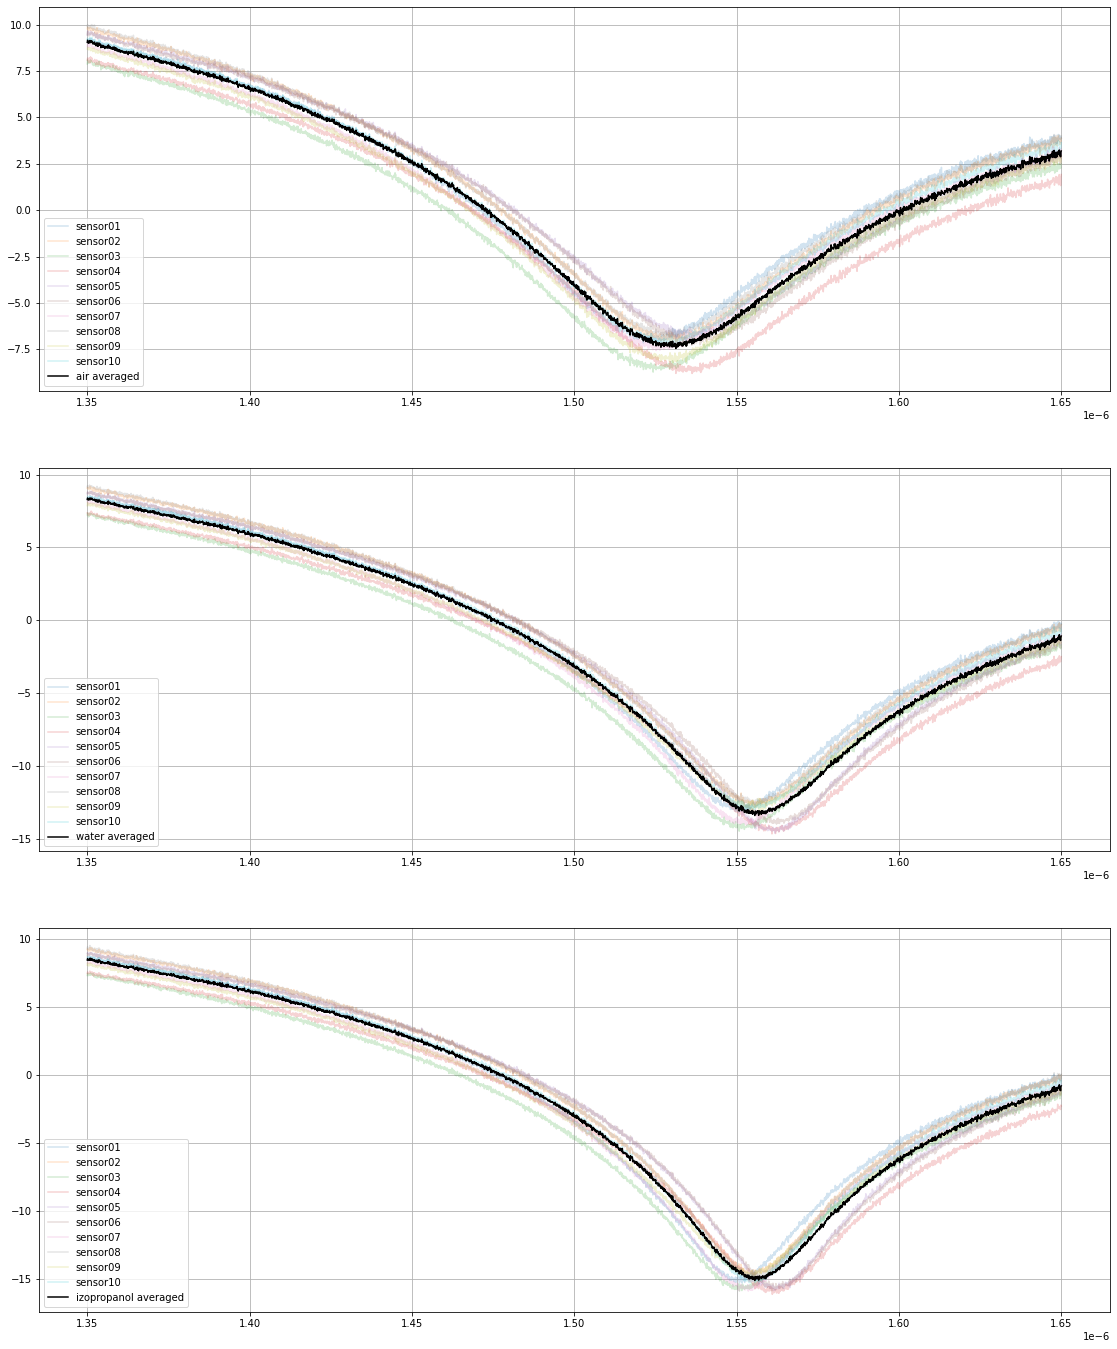

In [159]:
# how the mean (=averaged) measurement looks like in comparison with each measurement?

fig, ax = plt.subplots(3, 1, figsize=(6.4*3, 4.8*5))

for sensor_id in all_sensors:
  ax[0].plot(x, measurements_df['air'][sensor_id], label=sensor_id, alpha=0.2)
  ax[1].plot(x, measurements_df['water'][sensor_id], label=sensor_id, alpha=0.2)
  ax[2].plot(x, measurements_df['izopropanol'][sensor_id], label=sensor_id, alpha=0.2)

ax[0].plot(x, measurements_df['air']        ['sensors_avg'], label='air averaged', color='black')
ax[1].plot(x, measurements_df['water']      ['sensors_avg'], label='water averaged', color='black')
ax[2].plot(x, measurements_df['izopropanol']['sensors_avg'], label='izopropanol averaged', color='black')

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

ax[0].legend(loc='lower left')
ax[1].legend(loc='lower left')
ax[2].legend(loc='lower left')

plt.show()

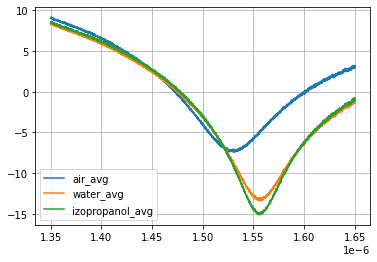

In [160]:
# comparison of mean measurement for all environments

plt.plot(x, measurements_df['air']        ['sensors_avg'], label='air_avg')
plt.plot(x, measurements_df['water']      ['sensors_avg'], label='water_avg')
plt.plot(x, measurements_df['izopropanol']['sensors_avg'], label='izopropanol_avg')

plt.grid(True)
plt.legend(loc='lower left')

In [ ]:
# the main idea for getting measurements is to approximate it from the air measurement
# by using correction function between water and izopropanol and air

In [161]:
# difference calculation

diff_water_air       = measurements_df['water']['sensors_avg']       - measurements_df['air']['sensors_avg']
diff_izopropanol_air = measurements_df['izopropanol']['sensors_avg'] - measurements_df['air']['sensors_avg']

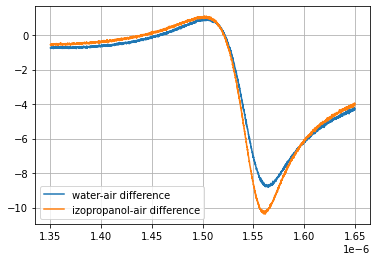

In [162]:
# the plot of differences

plt.plot(x, diff_water_air,       label='water-air difference')
plt.plot(x, diff_izopropanol_air, label='izopropanol-air difference')

plt.grid(True)
plt.legend(loc='lower left')

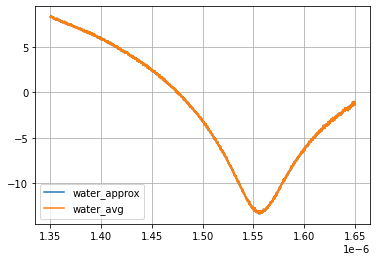

In [163]:
# the plot of differences for water

plt.plot(x, measurements_df['air']  ['sensors_avg'] + diff_water_air, label='water_approx')
plt.plot(x, measurements_df['water']['sensors_avg'], label='water_avg')

plt.grid(True)
plt.legend(loc='lower left')

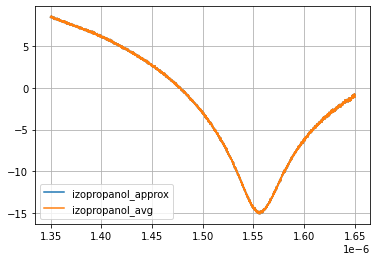

In [164]:
# the plot of differences of izopropanol

plt.plot(x, measurements_df['air']        ['sensors_avg'] + diff_izopropanol_air, label='izopropanol_approx')
plt.plot(x, measurements_df['izopropanol']['sensors_avg'], label='izopropanol_avg')

plt.grid(True)
plt.legend(loc='lower left')

In [165]:
x_array = x.values

diff_water_air_array       = diff_water_air.values
diff_izopropanol_air_array = diff_izopropanol_air.values

In [193]:
# difference is noisy - so the mean of each k measurement will be calculated in order to reduce the noise

k = 10

In [194]:
diff_water_air_array_averaged = np.mean(diff_water_air_array[:len(diff_water_air_array)-1].reshape(-1, k), axis=1)

diff_izopropanol_air_array_averaged = np.mean(diff_izopropanol_air_array[:len(diff_izopropanol_air_array)-1].reshape(-1, k), axis=1)

In [195]:
x_array_averaged = np.mean(x_array[:len(x_array)-1].reshape(-1, k), axis=1)

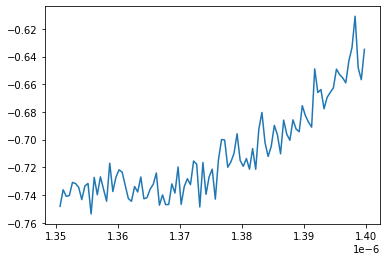

In [196]:
plt.plot(x_array_averaged[1:100], diff_water_air_array_averaged[1:100])

In [197]:
# samling the averaged difference for each environment

sampling_increment = 13
sparse_x = x_array_averaged[::sampling_increment]

sparse_diff_water_air       = diff_water_air_array_averaged[::sampling_increment]
sparse_diff_izopropanol_air = diff_izopropanol_air_array_averaged[::sampling_increment]

In [ ]:
# both difference functions will be approximated by cubic splic

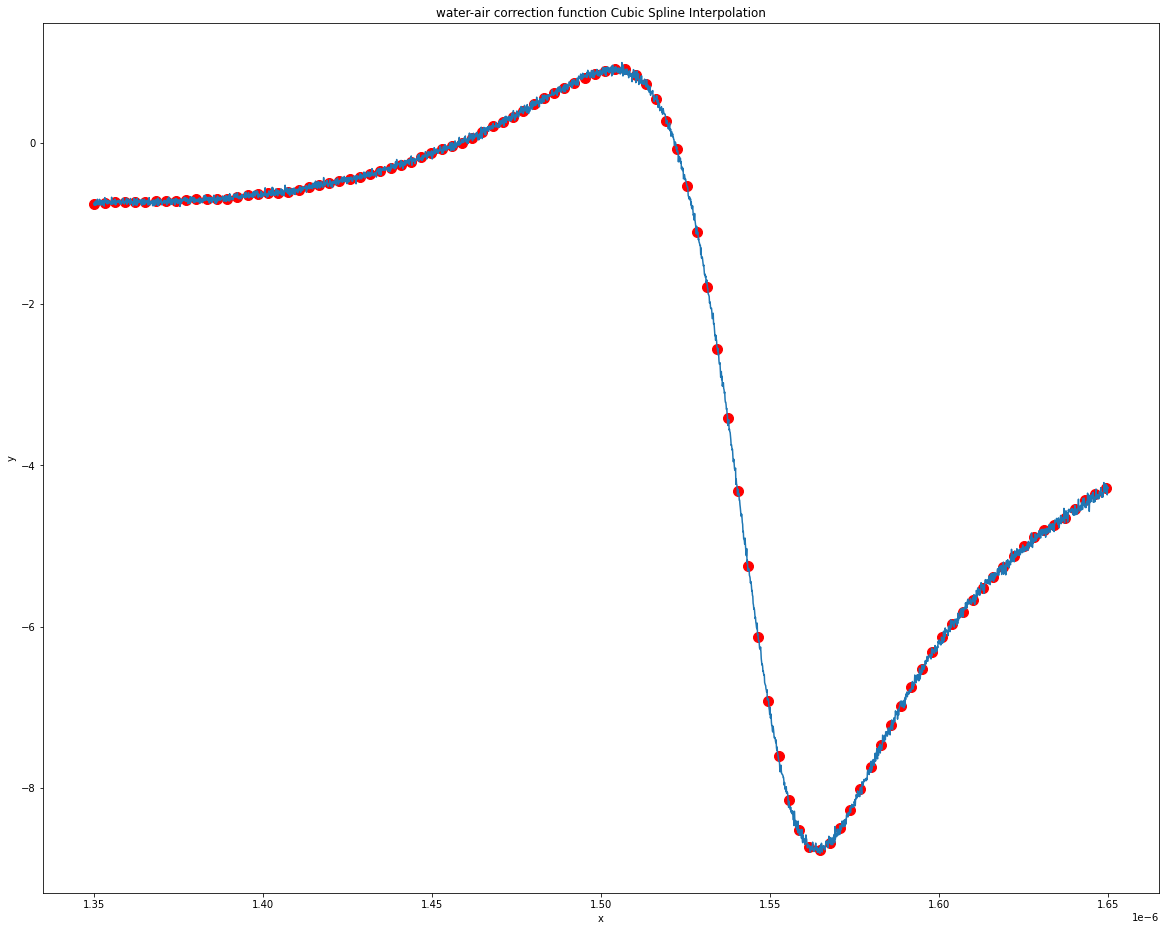

In [198]:
# cubic spline calculation for water-air correction function

x_min = min(sparse_x)
x_max = max(sparse_x)

x_interp = np.linspace(x_min, x_max, 100)
CSpline_water_air = CubicSpline(sparse_x, sparse_diff_water_air, bc_type='natural')
y_CSpline_water_air = CSpline_water_air(x_interp)

plt.figure(figsize = (10*2, 8*2))
#plt.plot(sparse_x, sparse_diff_water_air, 'b')
plt.plot(x_interp, y_CSpline_water_air, 'ro', markersize=10)
plt.plot(x, diff_water_air)
plt.title('water-air correction function Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



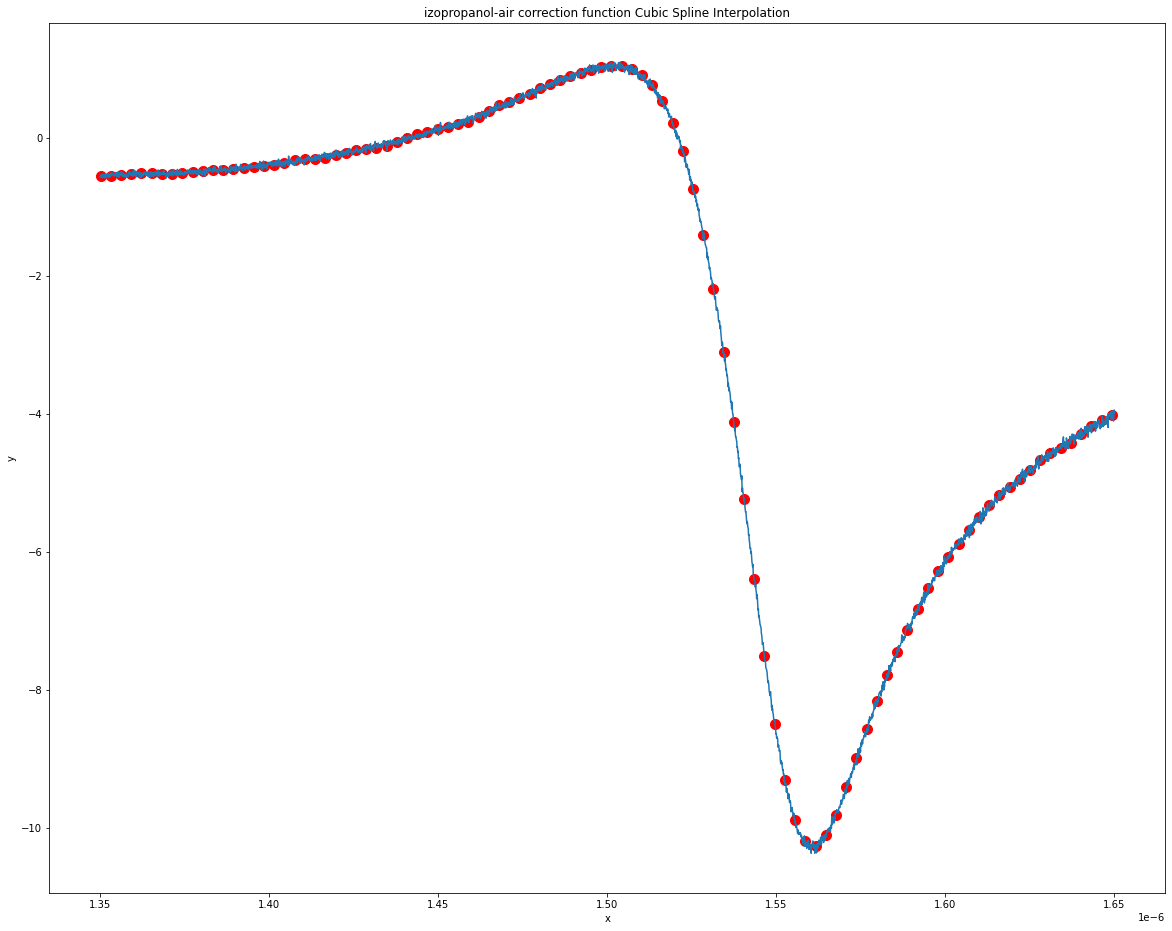

In [199]:
# cubic spline calculation for izopropanol-air correction function

x_min = min(sparse_x)
x_max = max(sparse_x)

x_interp = np.linspace(x_min, x_max, 100)
CSpline_izopropanol_air = CubicSpline(sparse_x, sparse_diff_izopropanol_air, bc_type='natural')
y_CSpline_izopropanol_air = CSpline_izopropanol_air(x_interp)

plt.figure(figsize = (10*2, 8*2))
#plt.plot(sparse_x, sparse_diff_izopropanol_air, 'b')
plt.plot(x_interp, y_CSpline_izopropanol_air, 'ro', markersize=10)
plt.plot(x, diff_izopropanol_air)
plt.title('izopropanol-air correction function Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [200]:
# getting both splines by correction functions

fun_correction_water_air = CSpline_water_air(x_array)
fun_correction_izopropanol_air = CSpline_izopropanol_air(x_array)

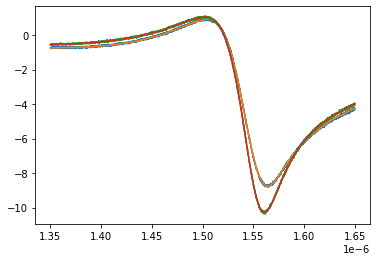

In [201]:
# plot shows that difference functions and their approximations are very close :)

plt.plot(x, diff_water_air)
plt.plot(x, fun_correction_water_air)

plt.plot(x, diff_izopropanol_air)
plt.plot(x, fun_correction_izopropanol_air)

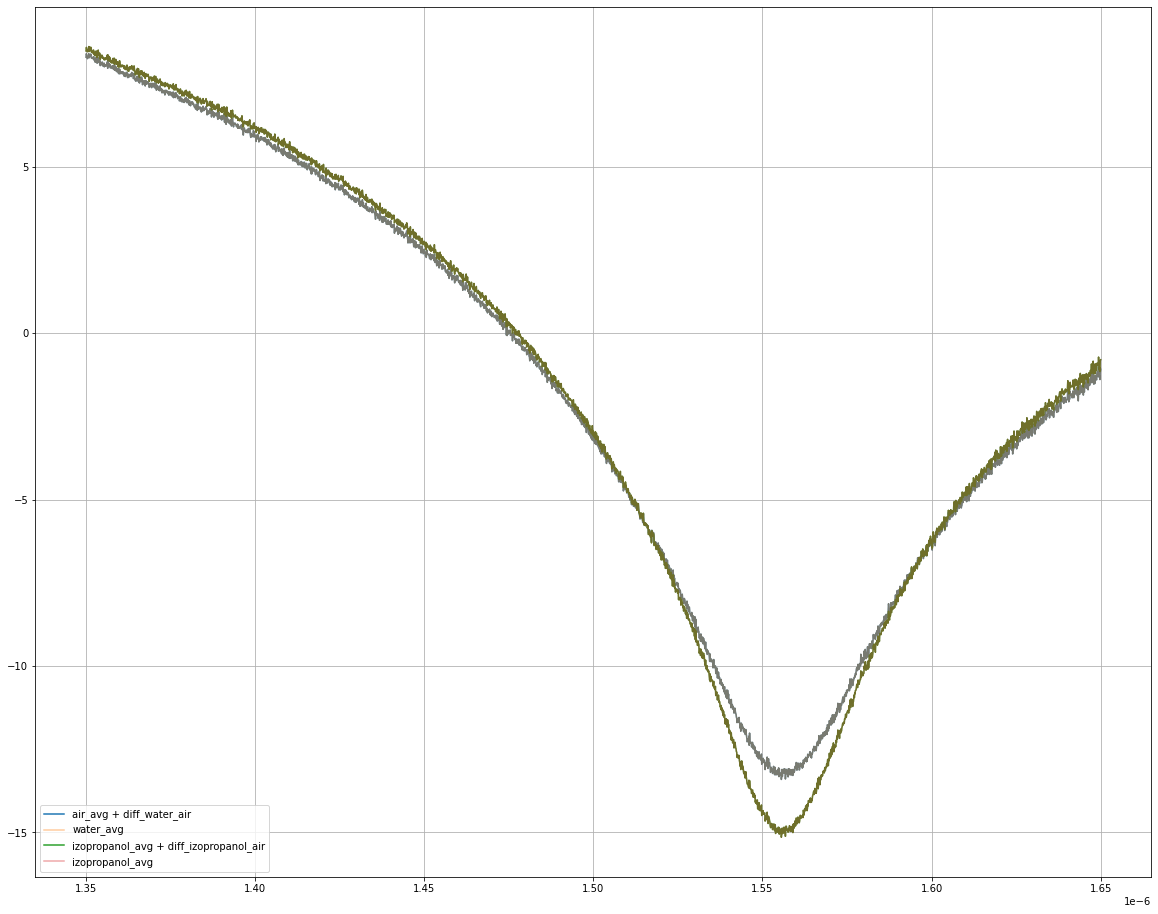

In [202]:
# another plot shows that difference functions and their approximations are very close :)

plt.figure(figsize = (10*2, 8*2))

plt.plot(x, measurements_df['air']  ['sensors_avg'] + diff_water_air, label='air_avg + diff_water_air')
plt.plot(x, measurements_df['water']['sensors_avg'], label='water_avg', alpha=0.4)

plt.plot(x, measurements_df['air']        ['sensors_avg'] + diff_izopropanol_air, label='izopropanol_avg + diff_izopropanol_air')
plt.plot(x, measurements_df['izopropanol']['sensors_avg'], label='izopropanol_avg', alpha=0.4)

plt.grid(True)
plt.legend(loc='lower left')

In [203]:
# calculation of approximated measurements using environment correction function
# and storing the results in new dictionary

measurements_approx_df = {} 

measurements_approx_df['water']       = pd.DataFrame()
measurements_approx_df['izopropanol'] = pd.DataFrame()

for sensor_id in measurements_dict:
  measurements_approx_df['water']      [sensor_id]       = measurements_df['air'][sensor_id] + fun_correction_water_air
  measurements_approx_df['izopropanol'][sensor_id]       = measurements_df['air'][sensor_id] + fun_correction_izopropanol_air

measurements_approx_df['water']      ['sensors_avg']       = measurements_approx_df['water'].mean(axis=1)
measurements_approx_df['izopropanol']['sensors_avg']       = measurements_approx_df['izopropanol'].mean(axis=1)


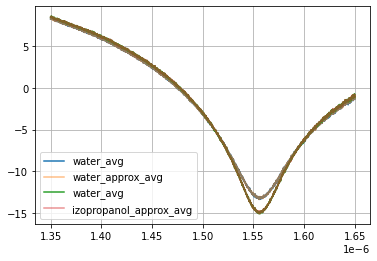

In [204]:
plt.plot(x, measurements_df       ['water']['sensors_avg'], label='water_avg'       )
plt.plot(x, measurements_approx_df['water']['sensors_avg'], label='water_approx_avg', alpha = 0.5)

plt.plot(x, measurements_df       ['izopropanol']['sensors_avg'], label='water_avg'       )
plt.plot(x, measurements_approx_df['izopropanol']['sensors_avg'], label='izopropanol_approx_avg', alpha = 0.5)

plt.grid(True)
plt.legend(loc='lower left')

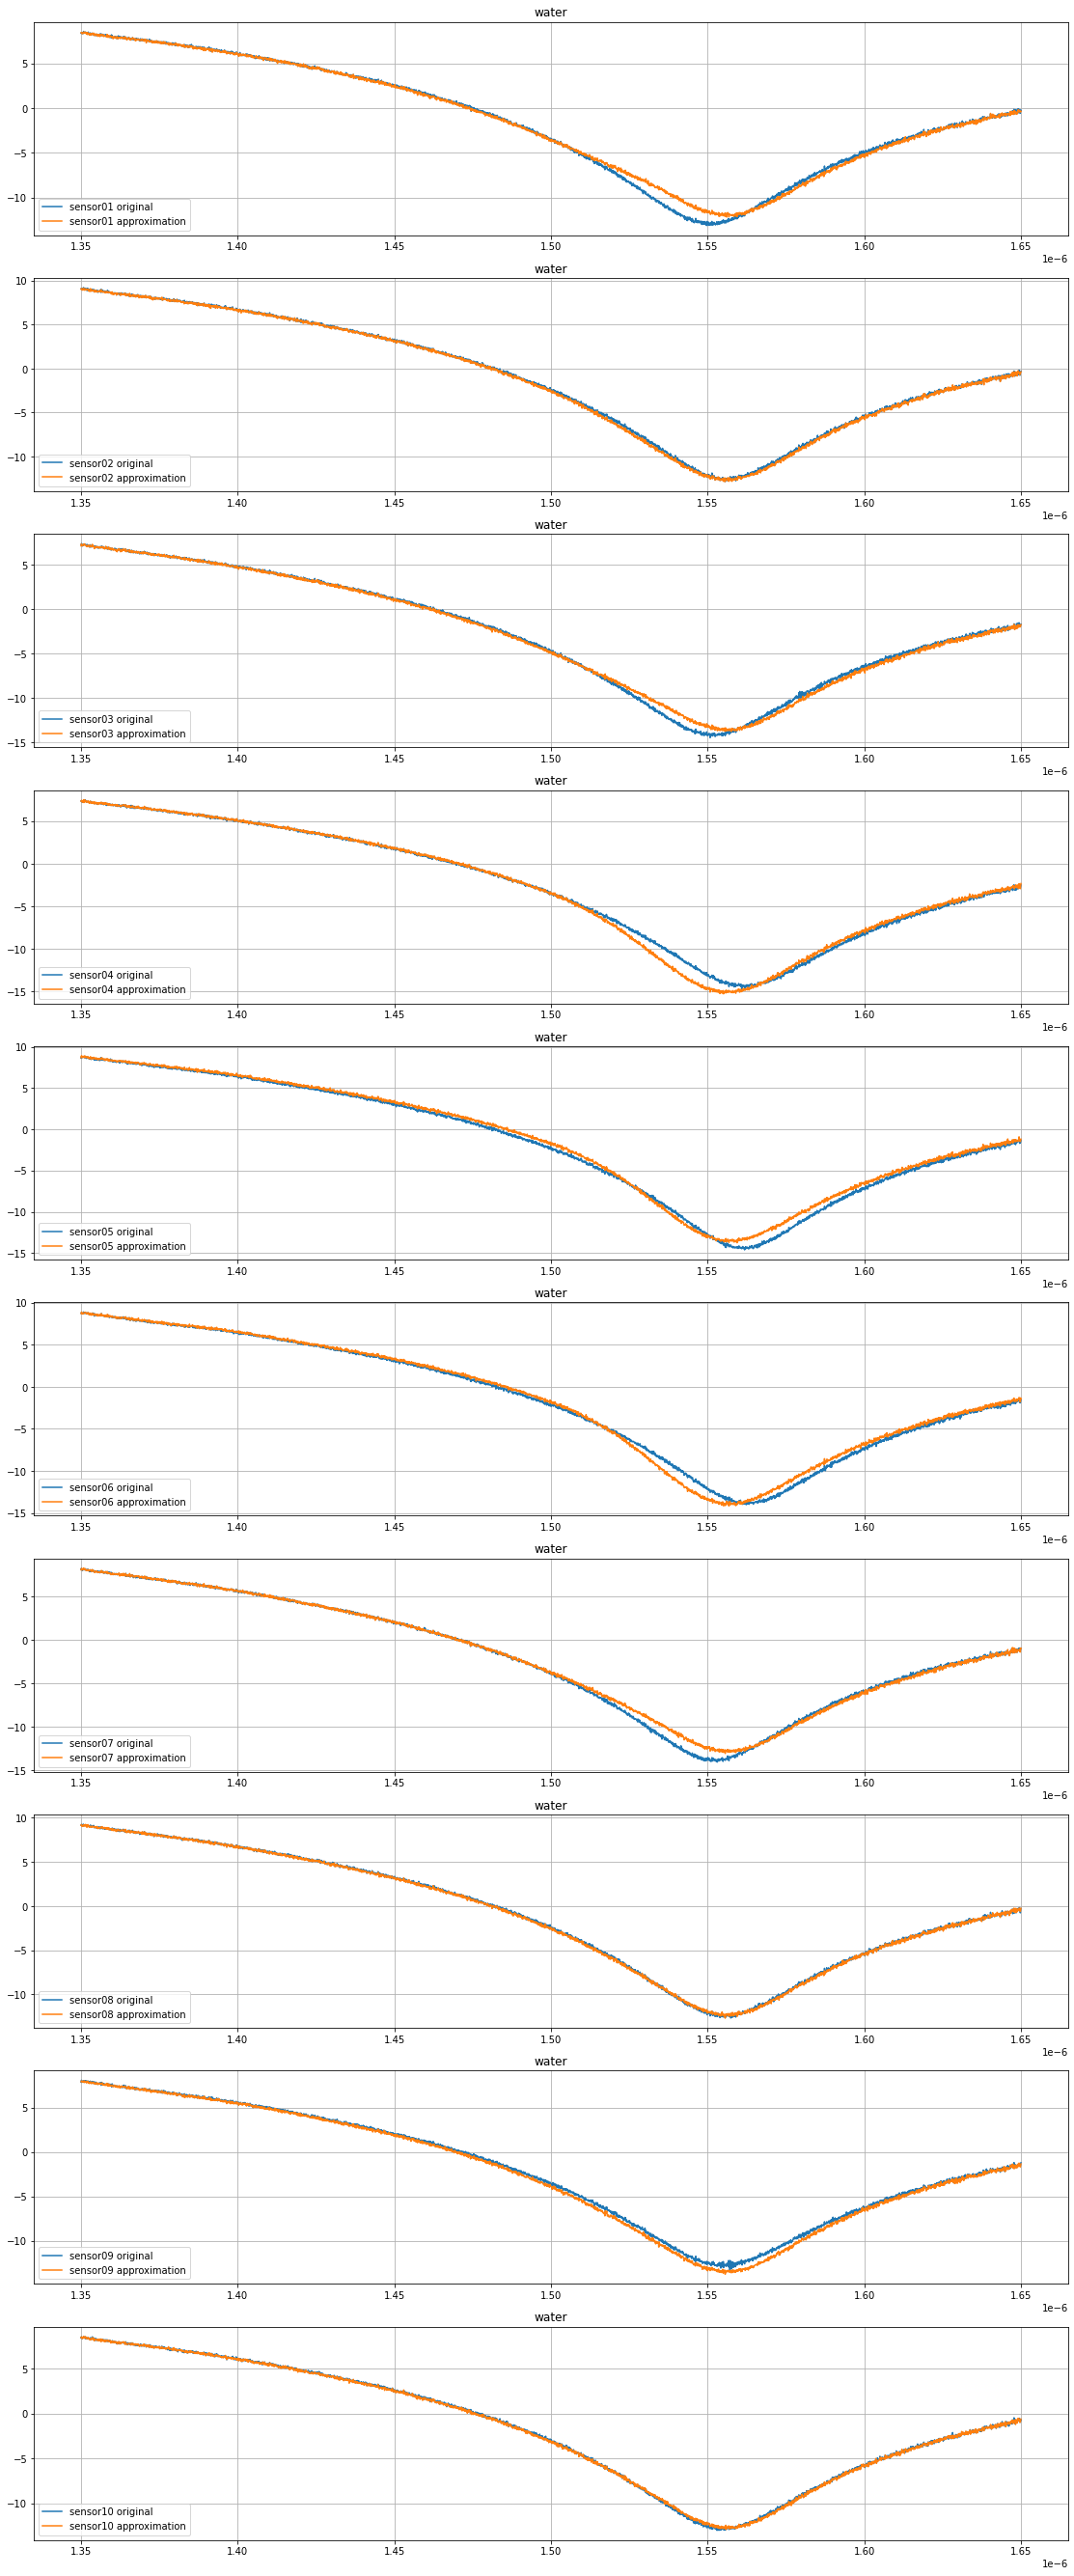

In [205]:
# plot the differences between real and approximated measurements for water

num_of_sensors = len(measurements_dict)
environment = 'water'

scale_x =  3
scale_y = 10

fig, ax = plt.subplots(num_of_sensors, 1, figsize=(6.4*scale_x, 4.8*scale_y))
num_ax = 0

for sensor_id in measurements_dict:
  ax[num_ax].plot(x, measurements_df       [environment][sensor_id], label=sensor_id + ' original')
  ax[num_ax].plot(x, measurements_approx_df[environment][sensor_id], label=sensor_id + ' approximation')
  ax[num_ax].title.set_text(environment)
  ax[num_ax].grid(True)
  ax[num_ax].legend(loc='lower left')
  num_ax += 1
  
plt.show()

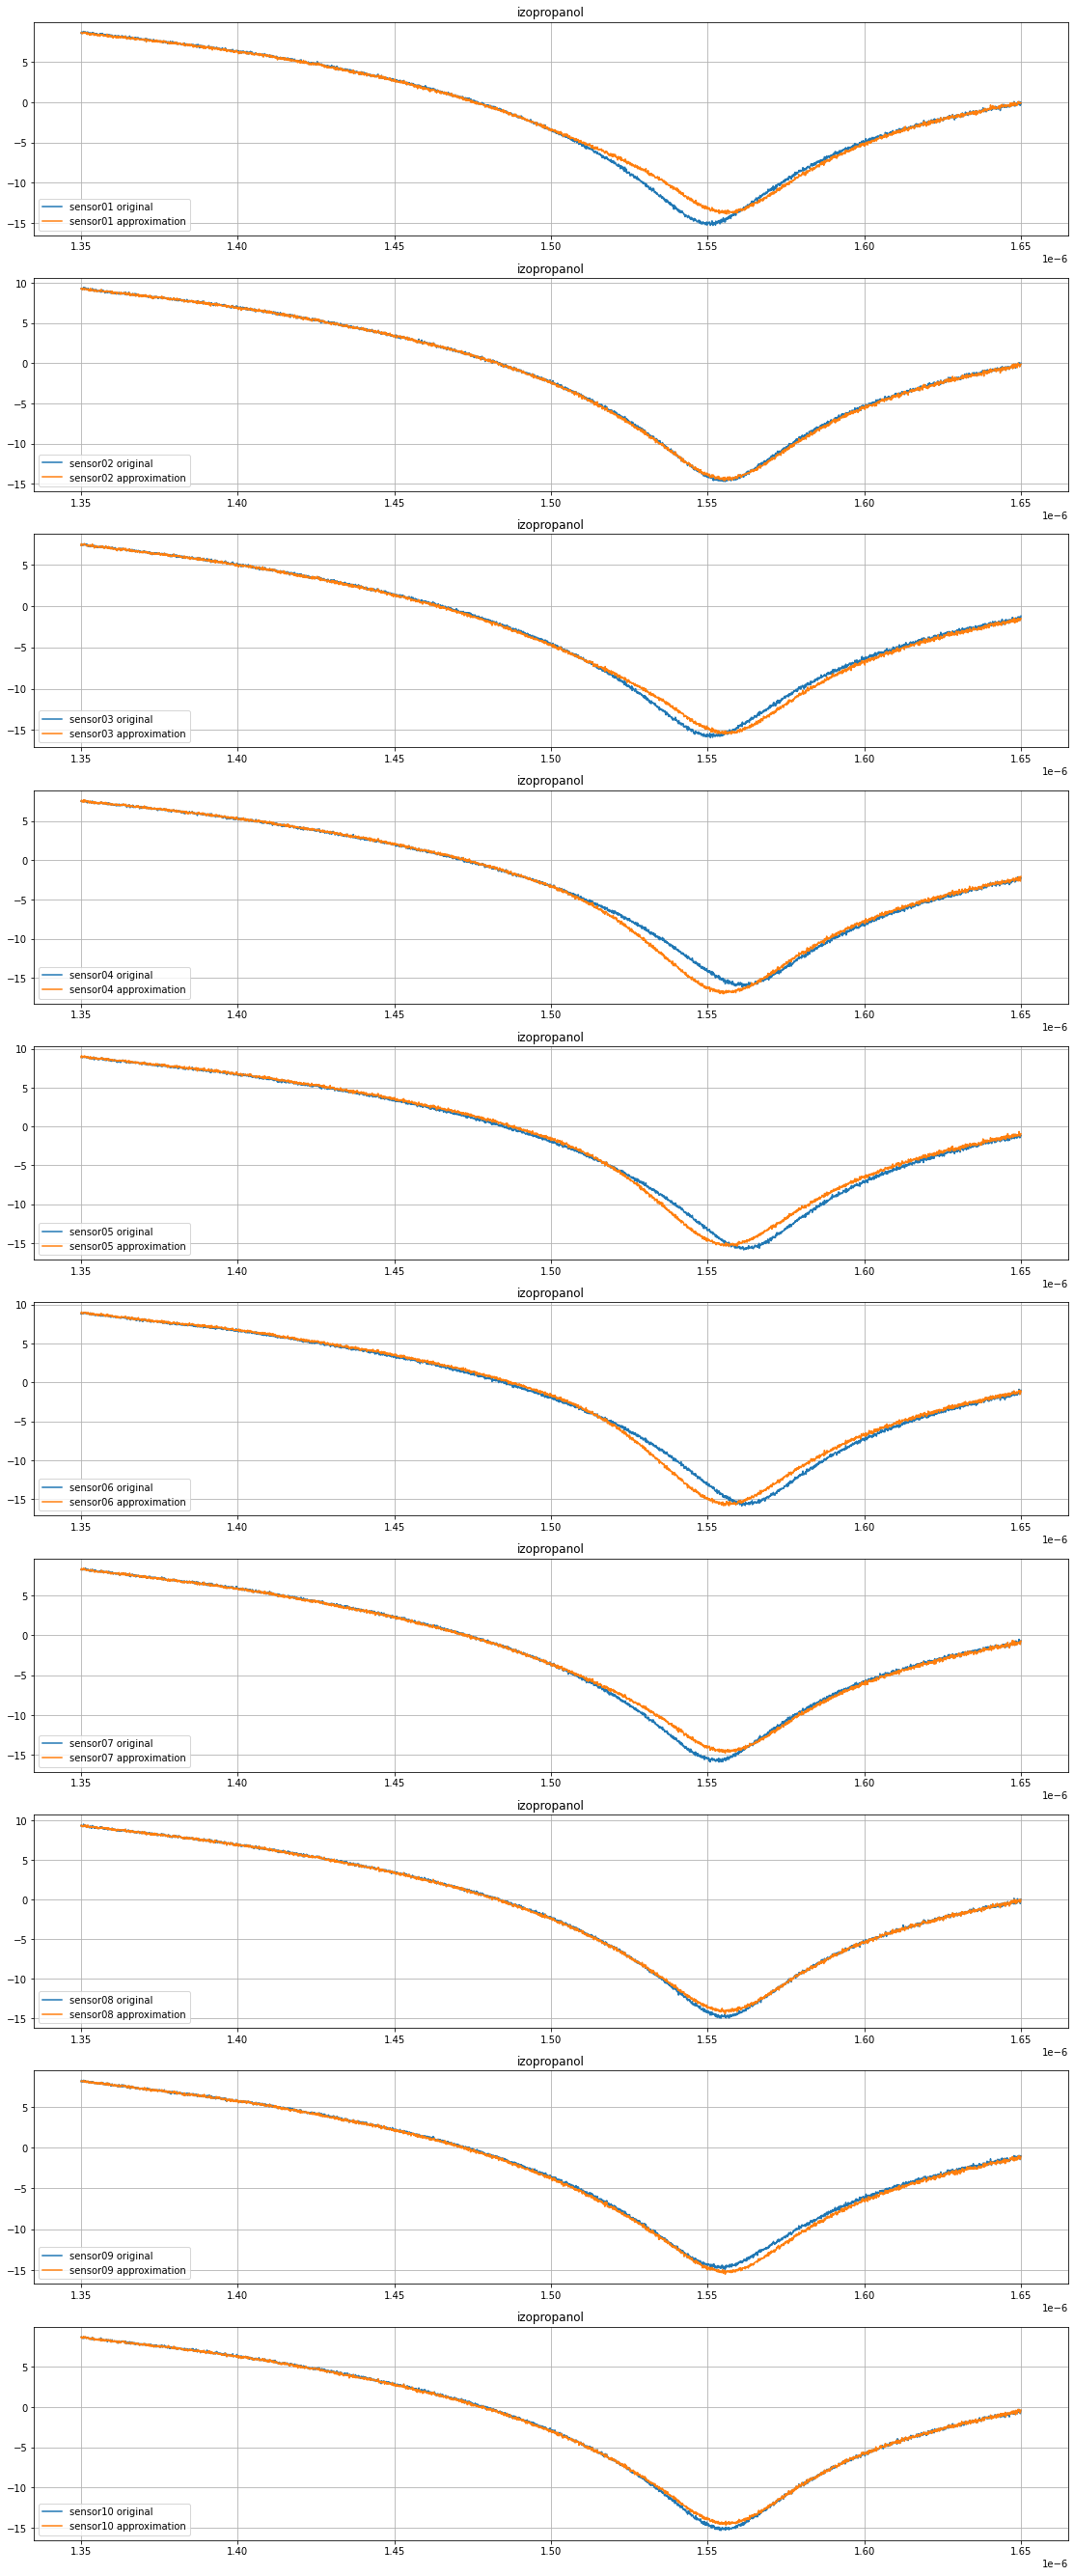

In [206]:
# plot the differences between real and approximated measurements for izopropanol

num_of_sensors = len(measurements_dict)
environment = 'izopropanol'

scale_x =  3
scale_y = 10

fig, ax = plt.subplots(num_of_sensors, 1, figsize=(6.4*scale_x, 4.8*scale_y))
num_ax = 0

for sensor_id in measurements_dict:
  ax[num_ax].plot(x, measurements_df       [environment][sensor_id], label=sensor_id + ' original')
  ax[num_ax].plot(x, measurements_approx_df[environment][sensor_id], label=sensor_id + ' approximation')
  ax[num_ax].title.set_text(environment)
  ax[num_ax].grid(True)
  ax[num_ax].legend(loc='lower left')
  num_ax += 1
  
plt.show()

In [207]:
# calculating the difference in order to calculate statistics

measurements_original_approx_diff_df = {} 

measurements_original_approx_diff_df['water']       = pd.DataFrame()
measurements_original_approx_diff_df['izopropanol'] = pd.DataFrame()

for sensor_id in measurements_dict:
  measurements_original_approx_diff_df['water']      [sensor_id] = measurements_df['water'][sensor_id]       - measurements_approx_df['water'][sensor_id]
  measurements_original_approx_diff_df['izopropanol'][sensor_id] = measurements_df['izopropanol'][sensor_id] - measurements_approx_df['izopropanol'][sensor_id]

In [208]:
measurements_original_approx_diff_df['water']

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
0,-0.064328,0.039272,0.110172,0.032972,-0.049028,0.035572,0.069472,0.013072,-0.062528,-0.057928
1,-0.014082,0.017018,0.012418,-0.050282,-0.087282,-0.054282,0.003818,0.003818,0.122418,0.016818
2,0.002564,0.069964,0.183964,-0.147236,-0.084636,-0.080536,-0.147936,0.033264,-0.009436,-0.004536
3,0.068410,0.067910,0.039910,-0.099790,-0.118990,-0.029090,0.040910,0.075510,0.046210,-0.023390
4,0.099756,0.052956,-0.067344,-0.009444,0.031456,0.069356,-0.100644,-0.044844,0.041556,0.007056
...,...,...,...,...,...,...,...,...,...,...
2996,-0.077921,0.102019,0.185539,-0.066761,-0.266361,-0.042561,0.228039,0.010039,-0.026261,0.124389
2997,0.036265,-0.321925,0.069855,-0.339045,-0.119745,-0.386345,-0.135245,0.089455,0.119755,0.000505
2998,-0.143952,0.125778,0.047568,0.084568,-0.139632,-0.128232,0.203368,-0.212872,0.110368,-0.021162
2999,0.122839,0.046129,-0.032621,-0.078621,-0.221621,-0.380621,-0.157521,0.066759,0.244679,0.173089


In [209]:
measurements_original_approx_diff_df['water'].describe()

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,-0.077054,0.115193,0.021127,0.104501,-0.333743,-0.093784,-0.129392,0.058159,0.272388,0.033632
std,0.497821,0.140707,0.378247,0.545008,0.386483,0.512556,0.440603,0.122265,0.243808,0.128336
min,-1.962418,-0.333886,-1.426884,-0.780732,-1.548506,-1.151420,-1.786549,-0.417224,-0.310579,-0.527809
25%,-0.062961,0.013500,-0.024348,-0.157494,-0.516558,-0.334624,-0.118676,-0.019419,0.085235,-0.037041
50%,0.055574,0.096835,0.083307,-0.045420,-0.283183,-0.162306,0.000388,0.057132,0.211014,0.041603
75%,0.169586,0.196533,0.208570,0.072431,-0.128463,-0.024589,0.100275,0.137059,0.431938,0.116061
max,0.691648,0.585102,0.829049,2.130375,0.847539,1.796940,0.542082,0.470765,1.221009,0.481253


In [210]:
measurements_original_approx_diff_df['izopropanol']

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
0,-0.064555,0.034645,0.019645,-0.041355,0.089545,-0.087355,0.012545,-0.023855,-0.028355,0.050145
1,0.034032,-0.003768,-0.057968,-0.022968,-0.075668,-0.042068,-0.087468,0.015432,0.101132,0.018132
2,0.073920,0.007220,0.092320,-0.069980,-0.031680,-0.141880,-0.118080,-0.047080,-0.012480,0.063620
3,0.171808,0.100308,0.032908,-0.057692,-0.141992,-0.076092,0.042808,0.063808,0.065808,-0.095692
4,0.177795,0.069095,-0.030305,0.059895,0.007295,-0.016505,-0.005005,-0.043505,-0.028605,0.048095
...,...,...,...,...,...,...,...,...,...,...
2996,-0.162053,0.060107,-0.049503,-0.043203,-0.263303,-0.007003,0.075987,0.045877,-0.011103,0.111717
2997,-0.058254,-0.036664,0.184906,-0.300494,-0.287494,-0.334194,-0.261594,0.016676,-0.004994,0.045016
2998,-0.239518,0.032852,0.177212,0.139012,-0.185688,0.106012,0.094712,-0.209608,-0.039088,-0.129268
2999,0.080087,0.001783,0.067413,0.089613,-0.047087,-0.067887,-0.025917,0.163353,0.276373,-0.024007


In [211]:
measurements_original_approx_diff_df['izopropanol'].describe()

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,-0.148841,0.059947,0.059489,0.154204,-0.161592,-0.067707,-0.092187,-0.021483,0.207286,-0.036841
std,0.659648,0.140809,0.447546,0.663012,0.580996,0.664144,0.461896,0.195126,0.255066,0.204321
min,-2.743728,-0.566858,-1.497021,-0.774293,-1.733221,-1.494353,-1.919040,-1.004842,-0.231515,-0.984731
25%,-0.084535,-0.032378,-0.021151,-0.162459,-0.365580,-0.322924,-0.069425,-0.066729,0.036734,-0.085417
50%,0.040080,0.048592,0.088112,-0.038879,-0.171285,-0.157563,0.040186,0.016352,0.132916,0.009750
75%,0.143701,0.144197,0.236345,0.080051,-0.035919,-0.028899,0.138564,0.091466,0.288037,0.083941
max,0.819992,0.541265,1.159648,2.546466,1.843239,2.341573,0.597782,0.380136,1.172462,0.466411


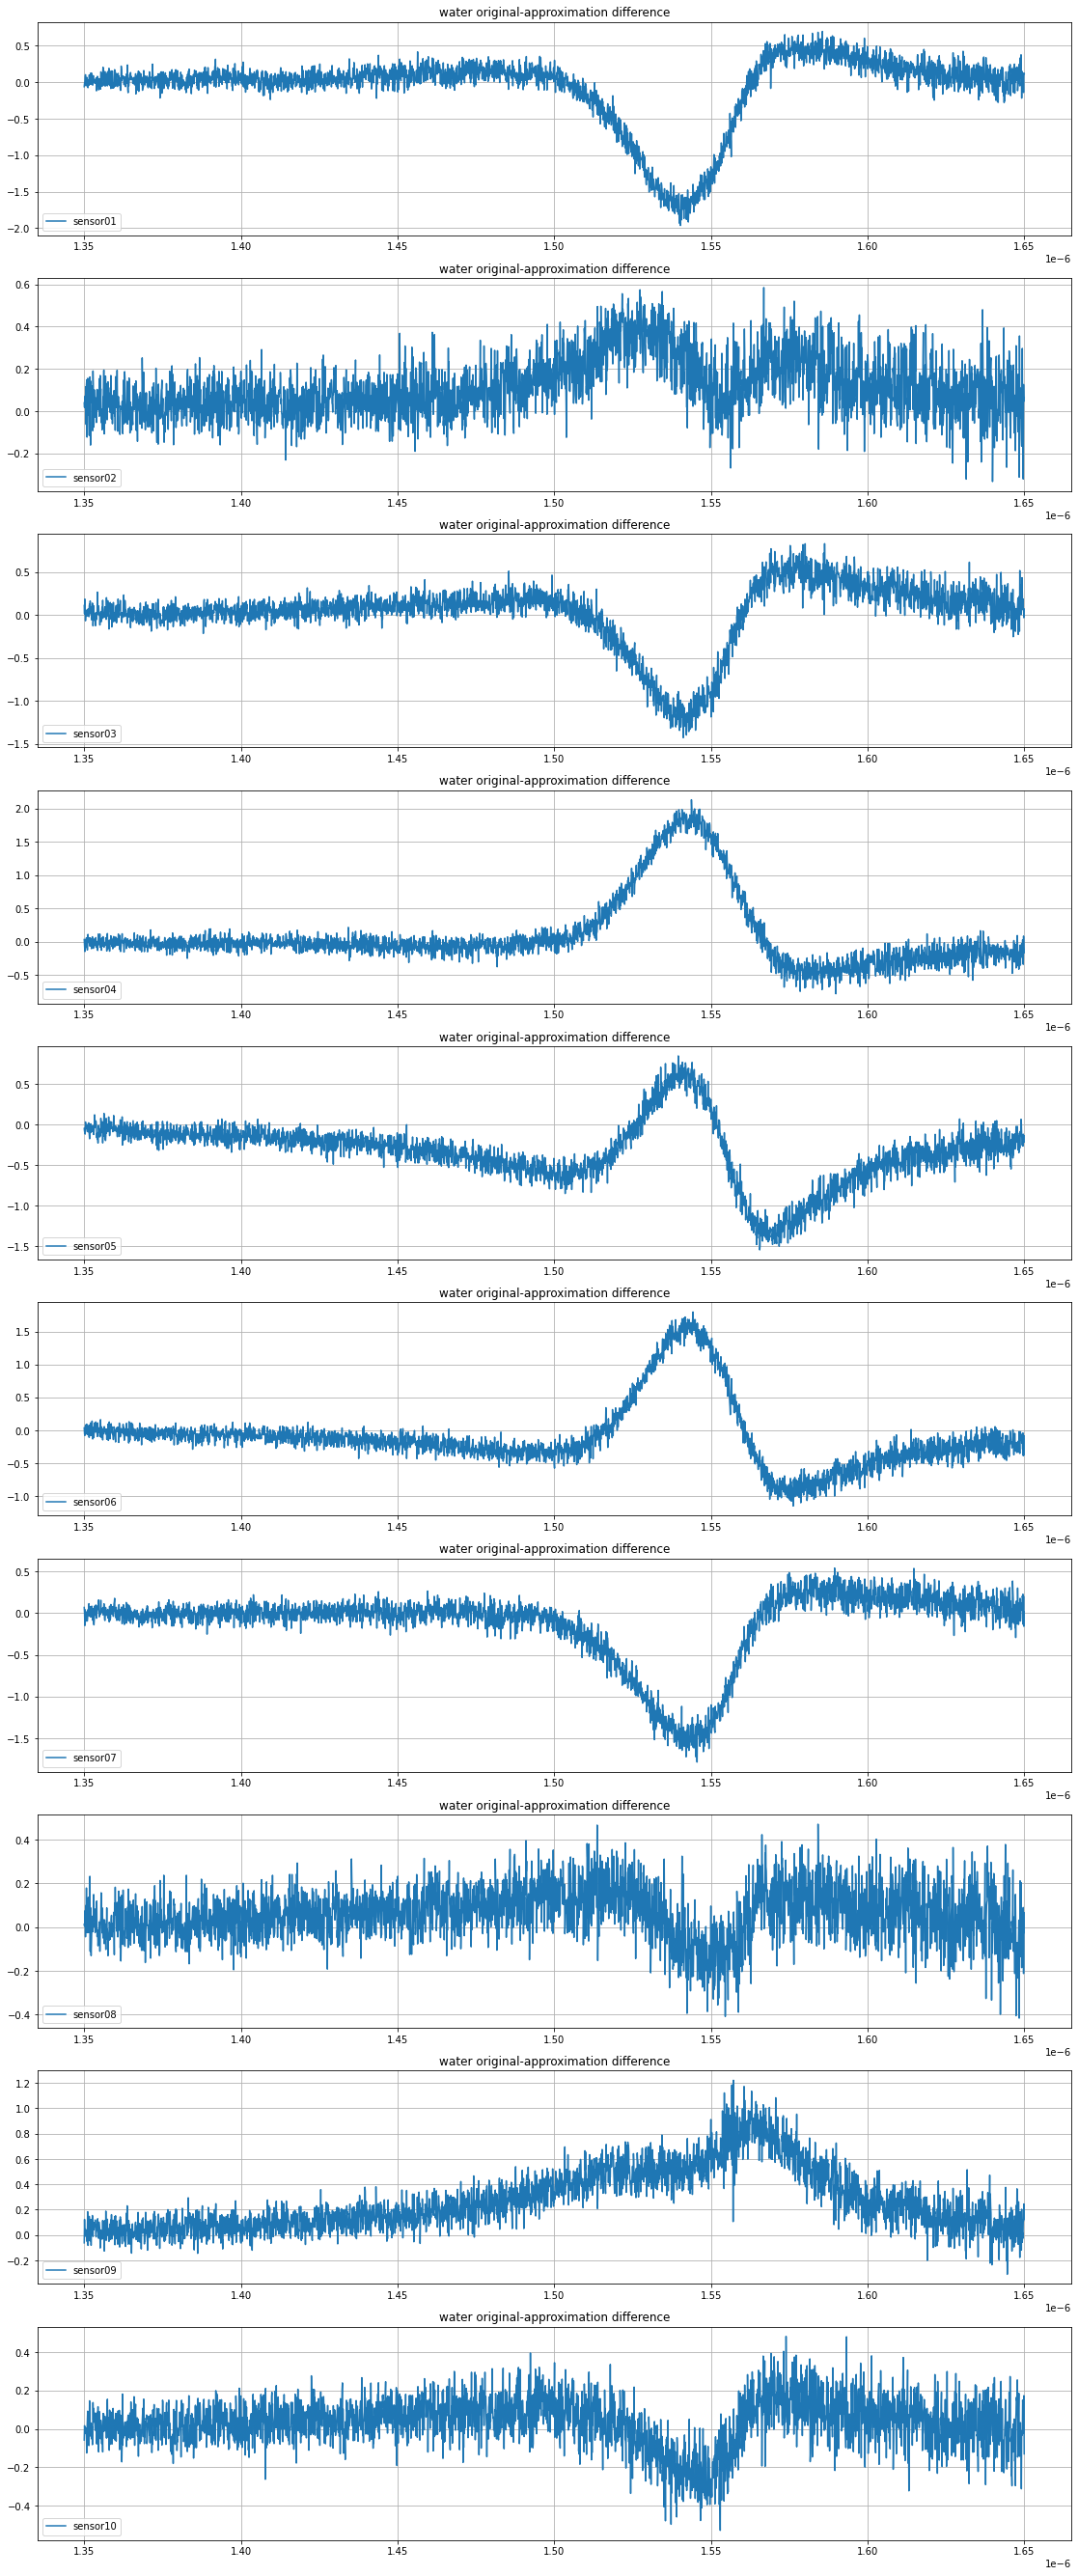

In [212]:
# plot the difference for each sensor and water

num_of_sensors = len(measurements_dict)
environment = 'water'

scale_x =  3
scale_y = 10

fig, ax = plt.subplots(num_of_sensors, 1, figsize=(6.4*scale_x, 4.8*scale_y))
num_ax = 0

for sensor_id in measurements_dict:
  ax[num_ax].plot(x, measurements_original_approx_diff_df[environment][sensor_id], label=sensor_id)
  ax[num_ax].title.set_text(environment + ' original-approximation difference')
  ax[num_ax].grid(True)
  ax[num_ax].legend(loc='lower left')
  num_ax += 1
  
plt.show()

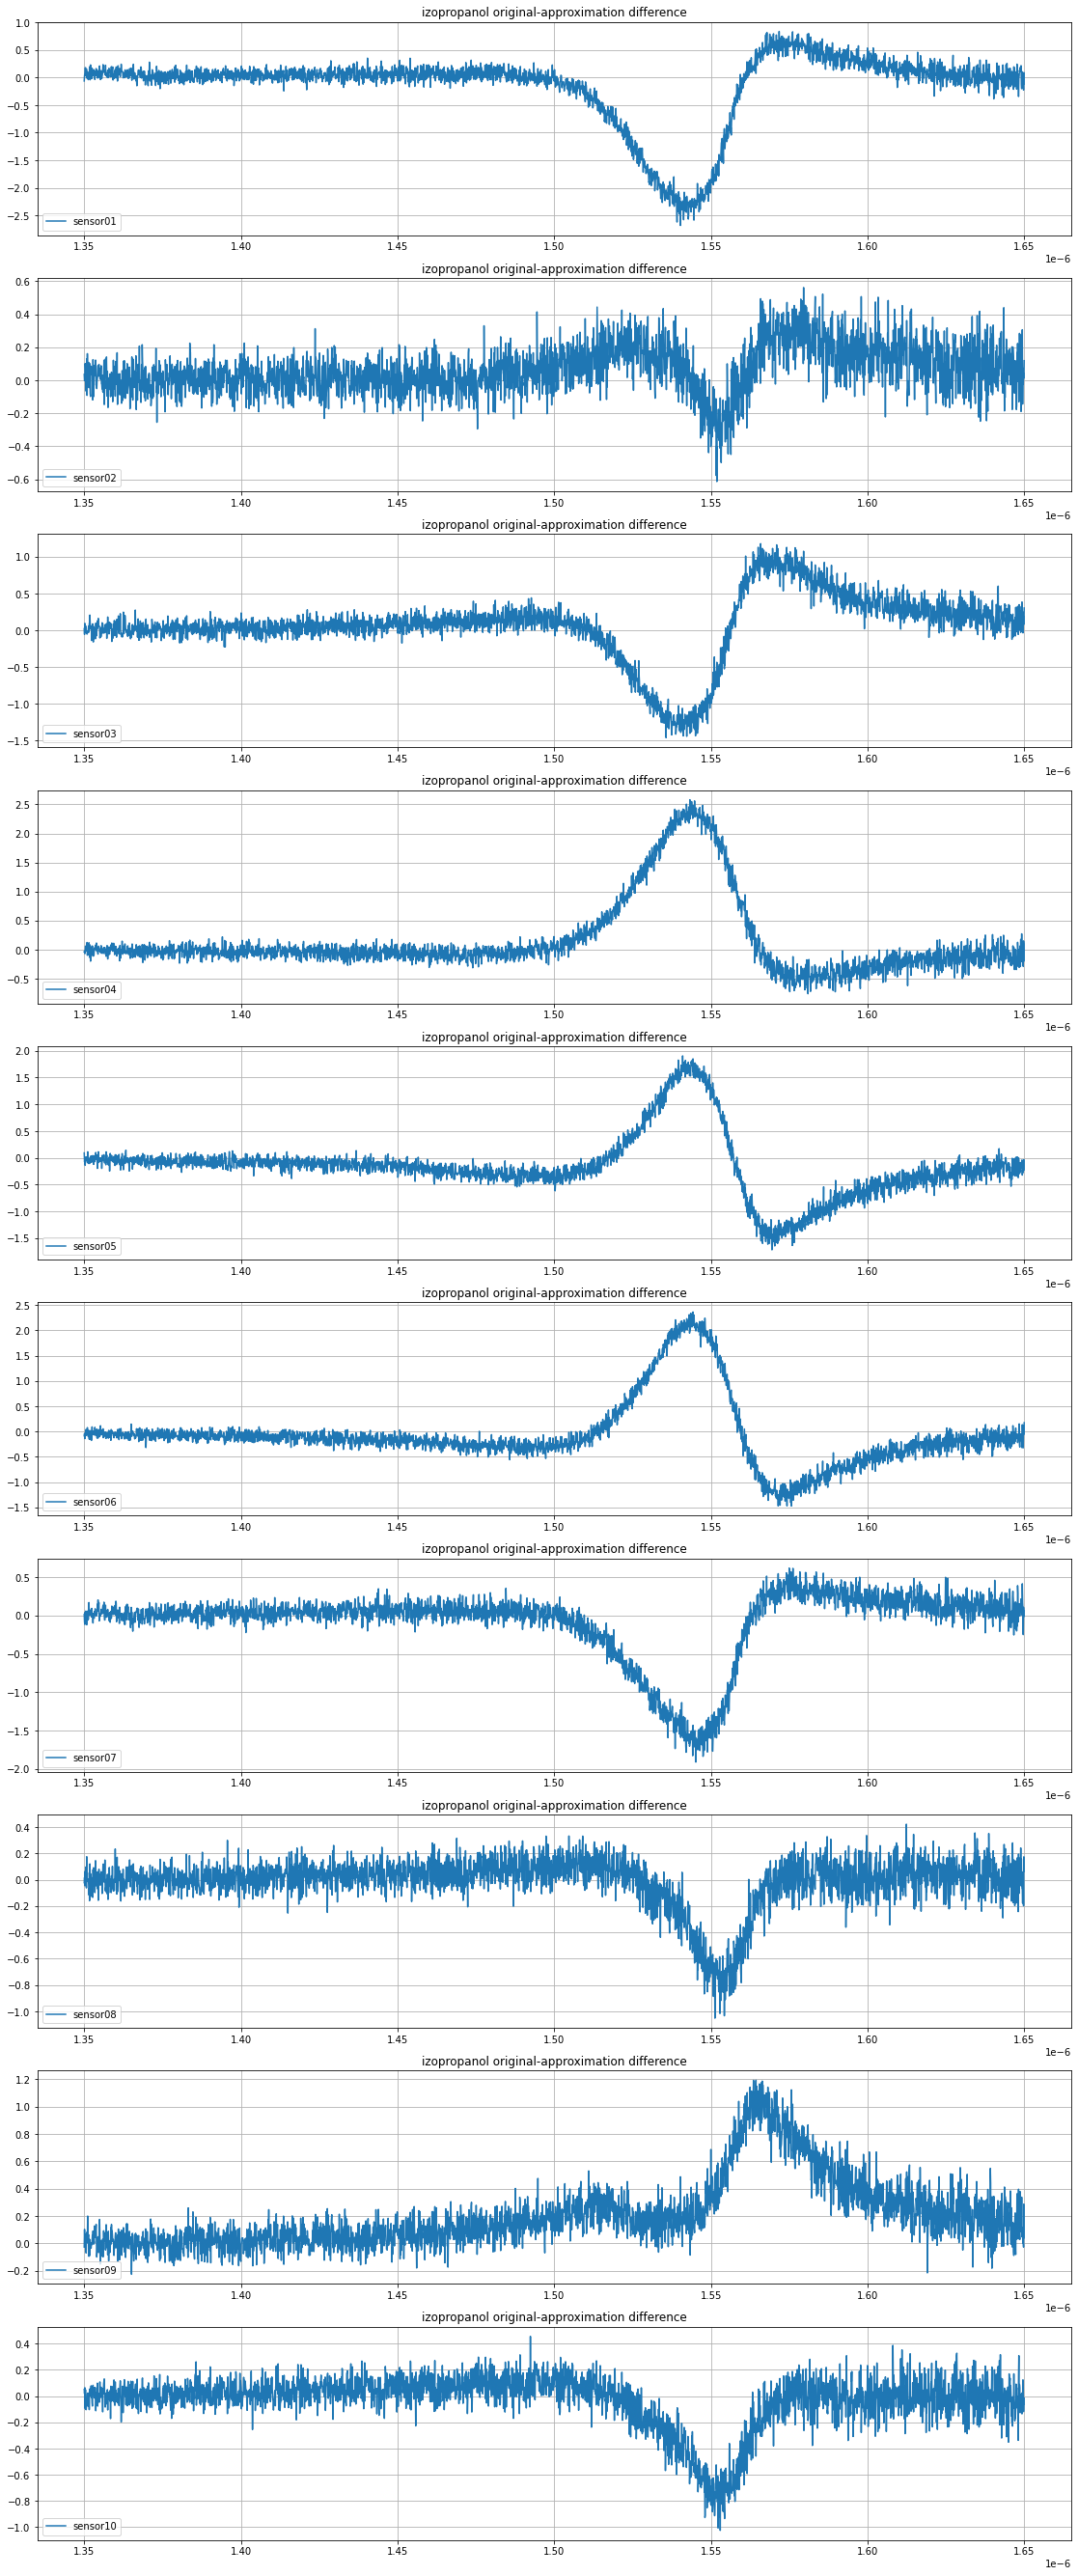

In [192]:
# plot the difference for each sensor and izopropanol

num_of_sensors = len(measurements_dict)
environment = 'izopropanol'

scale_x =  3
scale_y = 10

fig, ax = plt.subplots(num_of_sensors, 1, figsize=(6.4*scale_x, 4.8*scale_y))
num_ax = 0

for sensor_id in measurements_dict:
  ax[num_ax].plot(x, measurements_original_approx_diff_df[environment][sensor_id], label=sensor_id)
  ax[num_ax].title.set_text(environment + ' original-approximation difference')
  ax[num_ax].grid(True)
  ax[num_ax].legend(loc='lower left')
  num_ax += 1
  
plt.show()

In [217]:
# calculate the mean difference between real and approximated measurements

measurements_original_approx_diff_stats_df = {}

measurements_original_approx_diff_stats_df['water']       = pd.DataFrame(np.zeros(shape=(1, num_of_sensors)), 
                                                                         columns=measurements_dict,
                                                                         index=['mean'])
measurements_original_approx_diff_stats_df['izopropanol'] = pd.DataFrame(np.zeros(shape=(1, num_of_sensors)), 
                                                                         columns=measurements_dict,
                                                                         index=['mean'])

for sensor_id in measurements_dict:
  measurements_original_approx_diff_stats_df['water'][sensor_id]['mean']       = measurements_original_approx_diff_df['water'][sensor_id].mean()
  measurements_original_approx_diff_stats_df['izopropanol'][sensor_id]['mean'] = measurements_original_approx_diff_df['izopropanol'][sensor_id].mean()


In [120]:
# mean difference values for each sensor

measurements_original_approx_diff_stats_df['water']

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
mean,-0.076295,0.115953,0.021887,0.105261,-0.332983,-0.093024,-0.128632,0.058919,0.273148,0.034392


In [218]:
measurements_original_approx_diff_stats_df['izopropanol']

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
mean,-0.148841,0.059947,0.059489,0.154204,-0.161592,-0.067707,-0.092187,-0.021483,0.207286,-0.036841


<AxesSubplot:>

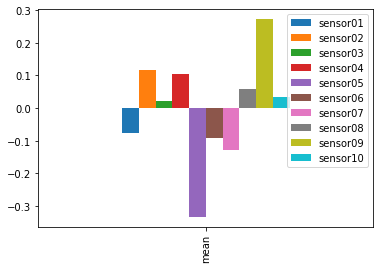

In [121]:
# plot of mean difference values for each sensor and water

measurements_original_approx_diff_stats_df['water'].plot(kind='bar')

<AxesSubplot:>

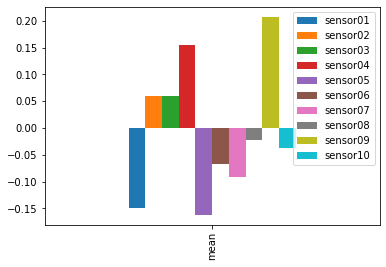

In [219]:
# plot of mean difference values for each sensor and izopropanol

measurements_original_approx_diff_stats_df['izopropanol'].plot(kind='bar')

In [ ]:
# now its the customer decision for usage of the method presented above :)